In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, LearningCurveDisplay, learning_curve, validation_curve
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    fbeta_score,
    classification_report,
    make_scorer,
    silhouette_score
)


from utils import get_data, get_df_details, plot_distrb, make_confusion_matrix

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
X = pd.read_csv('data/CC GENERAL.csv')
X.drop(columns=['CUST_ID'], inplace=True)
X.ffill(inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Split data into train and test sets.

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, _, _ = train_test_split(X, X, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [16]:
num_cols = X.columns

# Train the KMeans

In [17]:
RANDOM_STATE = 42
# N_FOLDS = 5
N_JOBS = -1
VERBOSE = 4


# Use minmax scaler for simplicity, scalability, avoids assumption of distribution and there are no outliers in data
num_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])
# # cat_pipeline = Pipeline(steps=[
# #     ('one-hot', OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse=False))
# # ])

col_trans = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_cols),
        # ('cat_pipeline', cat_pipeline, cat_cols)
        ],
    remainder='drop',
    n_jobs=N_JOBS)

# For KMeans use the default algo and max_iterations
clus = KMeans(n_jobs=N_JOBS, n_init=100)
clus_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', clus)
])


In [18]:
results = {}
for n_clusters in range(2, 20):
    print(f"---------- n_clusters: {n_clusters} ----------")
    clus_pipeline.set_params(model__n_clusters=n_clusters)
    clus_pipeline.fit(X_train)
    
    clus_labels = clus_pipeline.named_steps['model'].labels_
    sil_score = silhouette_score(X_train, clus_labels)
    
    results[n_clusters] = {'inertia': clus_pipeline.named_steps['model'].inertia_,
                           'sil_score': sil_score}

---------- n_clusters: 2 ----------
---------- n_clusters: 3 ----------
---------- n_clusters: 4 ----------
---------- n_clusters: 5 ----------
---------- n_clusters: 6 ----------
---------- n_clusters: 7 ----------
---------- n_clusters: 8 ----------
---------- n_clusters: 9 ----------
---------- n_clusters: 10 ----------
---------- n_clusters: 11 ----------
---------- n_clusters: 12 ----------
---------- n_clusters: 13 ----------
---------- n_clusters: 14 ----------
---------- n_clusters: 15 ----------
---------- n_clusters: 16 ----------
---------- n_clusters: 17 ----------
---------- n_clusters: 18 ----------
---------- n_clusters: 19 ----------


In [19]:
print(results)

{2: {'inertia': 2837.2822072280874, 'sil_score': 0.04979370094760811}, 3: {'inertia': 2373.4929364573254, 'sil_score': -0.01094753457015709}, 4: {'inertia': 2071.669320218081, 'sil_score': -0.059680683360346896}, 5: {'inertia': 1839.026185483405, 'sil_score': -0.0684424064693816}, 6: {'inertia': 1668.7377391999232, 'sil_score': -0.10803975718338955}, 7: {'inertia': 1509.624981103537, 'sil_score': -0.11970073142335767}, 8: {'inertia': 1385.9933106595843, 'sil_score': -0.11803714900454583}, 9: {'inertia': 1283.8276457553206, 'sil_score': -0.12866646448690144}, 10: {'inertia': 1185.4526851128303, 'sil_score': -0.12747971307990727}, 11: {'inertia': 1109.8534323471752, 'sil_score': -0.2188183312044253}, 12: {'inertia': 1055.6051967265155, 'sil_score': -0.1696466277357057}, 13: {'inertia': 1007.8268695595054, 'sil_score': -0.17169580787494526}, 14: {'inertia': 960.7298516414701, 'sil_score': -0.1825802949227806}, 15: {'inertia': 923.0226224395618, 'sil_score': -0.18307343884080665}, 16: {'in

<Axes: title={'center': 'Elbow plot'}, xlabel='n_clusters'>

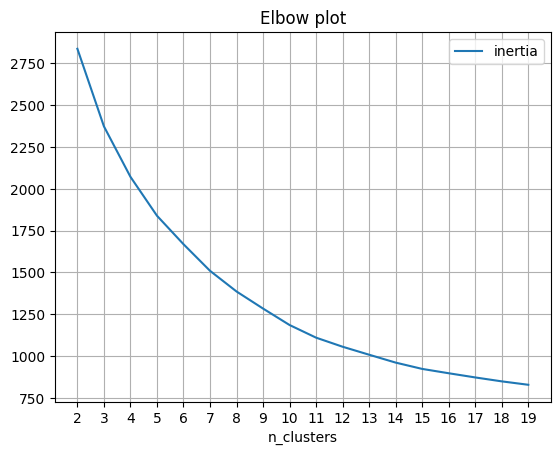

In [21]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['n_clusters', 'inertia', 'sil_score']
results_df.plot(x='n_clusters', y='inertia',title='Elbow plot', xticks=results_df['n_clusters'], grid=True)

<Axes: title={'center': 'Silhoutte Score'}, xlabel='n_clusters'>

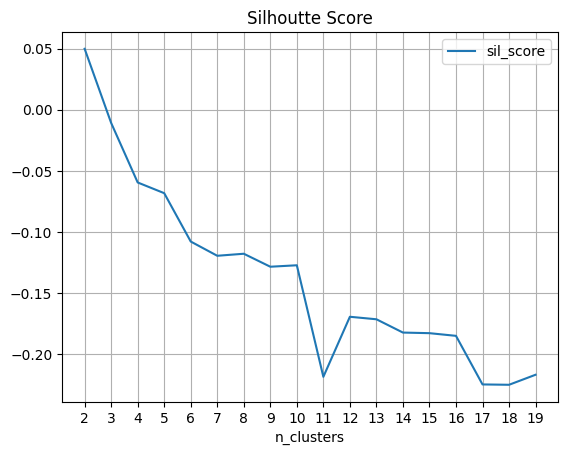

In [22]:
results_df.plot(x='n_clusters', y='sil_score',title='Silhoutte Score', xticks=results_df['n_clusters'], grid=True)

# Tune the KMeans

In [67]:
# # https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/
# # 

# cv_scores = []

# grid_params = {
#         'n_clusters': {'model__n_clusters': np.arange(2,21)}, 
#         'n_init': {'model__n_init': np.arange(5, 55, 5)},
#         'init': {'model__init': ['k-means++', 'random']},
#         'max_iter': {'model__max_iter': np.arange(100, 1000, 100)},
#     }
# for key, grid_param in grid_params.items():
#     print('------------------', key, '------------------')
    
#     gs = GridSearchCV(clus_pipeline, grid_param, 
#                       cv=N_FOLDS, scoring=silhouette_score, n_jobs=N_JOBS, verbose=VERBOSE, return_train_score=True,
#                      refit=True)
#     gs.fit(X_train)

#     cv_scores.append(pd.DataFrame({'param': [key]*len(gs.cv_results_['mean_test_score']),
#                                    'value': gs.cv_results_[f'param_{list(grid_param.keys())[0]}'],
#                                    'mean_test_score': gs.cv_results_['mean_test_score'],
#                                    'mean_train_score': gs.cv_results_['mean_train_score']}))

# cv_scores = pd.concat(cv_scores)

------------------ n_clusters ------------------
Fitting 5 folds for each of 19 candidates, totalling 95 fits


C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
  warnings.warn(
C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
  warnings.warn(


------------------ n_init ------------------
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


------------------ init ------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan]
  warnings.warn(
C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [nan nan]
  warnings.warn(


------------------ max_iter ------------------
Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


C:\Users\pavan\anaconda3\envs\ml\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


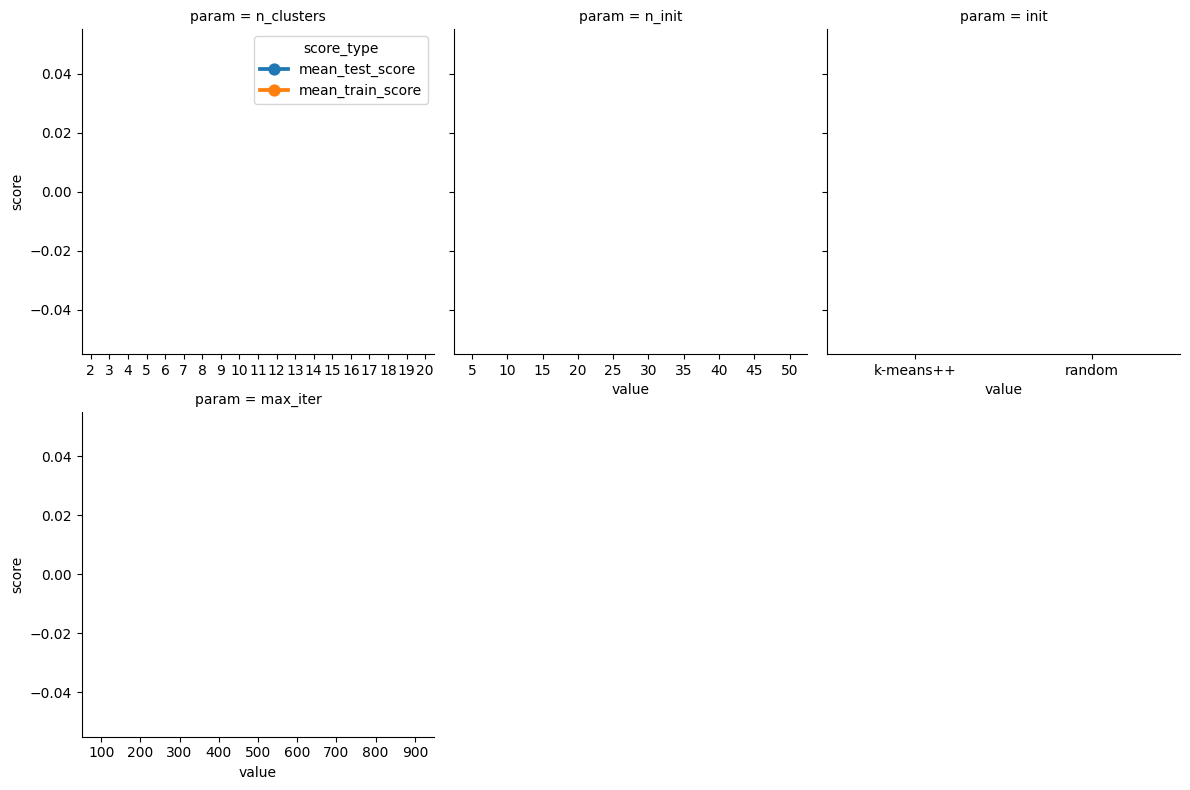

In [68]:
# cv_scores_melt = cv_scores.melt(id_vars=['param', 'value'], value_vars=['mean_test_score', 'mean_train_score'], var_name='score_type', value_name='score')
# sns.FacetGrid(cv_scores_melt, col='param', hue='score_type', col_wrap=3, height=4, sharex=False, legend_out=False).map(sns.pointplot, 'value', 'score').add_legend()

In [ ]:
# grid_params = {
#         'model__n_neighbors': np.arange(35, 50, 5), 
#         'model__metric':['minkowski', 'manhattan', 'euclidean'],
#     }

    
# gs = GridSearchCV(clf_pipeline, grid_params, 
#                     cv=N_FOLDS, scoring=SCORING, n_jobs=N_JOBS, verbose=VERBOSE, return_train_score=True)
# gs.fit(X_train, y_train.values.ravel())

# print("Best Score of train set: "+str(gs.best_score_))
# print("Best parameter set: "+str(gs.best_params_))
# print("Test Score: "+str(gs.score(X_test,y_test)))

In [ ]:
gs.best_estimator_['model']

In [ ]:
import joblib
joblib.dump(value=gs, filename='./model/kmeans_dry_bean_ppl.pkl', compress=True)
joblib.dump(value=gs.best_estimator_, filename='./model/kmeans_dry_bean_ppl.pkl', compress=True)

In [ ]:
# Plot learning curve of the best model from grid search
train_size_abs, train_scores, test_scores = \
    learning_curve(gs.best_estimator_, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=N_FOLDS, n_jobs=N_JOBS, scoring=SCORING, verbose=VERBOSE)

In [ ]:
plot_df = pd.DataFrame({'train_size_abs': train_size_abs, 
                        'mean_train_scores': np.mean(train_scores, axis=1), 
                        'mean_test_scores': np.mean(test_scores, axis=1)})
plot_df = plot_df.melt(id_vars='train_size_abs', value_vars=['mean_train_scores', 'mean_test_scores'])
sns.pointplot(plot_df, x='train_size_abs',y ='value', hue='variable')

In [ ]:
# Get the score of the best model on test

# gs.best_estimator_ is the best model found by GridSearchCV
y_test_predictions = gs.predict(X_test)
# Generate confusion matrix for the predictions from the best model
conf_matrix = confusion_matrix(y_test, y_test_predictions)

make_confusion_matrix(conf_matrix, group_names=['True Neg','False Pos','False Neg','True Pos'], categories=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], cmap='Blues')

In [ ]:
# target_names=target_names
print(classification_report(y_test, y_test_predictions))